# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']
male_mean_height = male_df['Height'].mean()
male_std_height = male_df['Height'].std()
male_mean_weight = male_df['Weight'].mean()
male_std_weight = male_df['Weight'].std()
female_mean_height = female_df['Height'].mean()
female_std_height = female_df['Height'].std()
female_mean_weight = female_df['Weight'].mean()
female_std_weight = female_df['Weight'].std()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

(array([0.00177764, 0.00826081, 0.03272954, 0.08919584, 0.13865614,
        0.1323821 , 0.0819807 , 0.03042906, 0.00679687, 0.0006274 ]),
 array([54.26313333, 56.17577858, 58.08842383, 60.00106909, 61.91371434,
        63.8263596 , 65.73900485, 67.6516501 , 69.56429536, 71.47694061,
        73.38958587]),
 <a list of 10 Patch objects>)

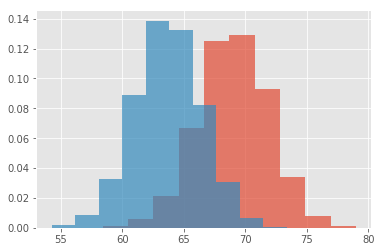

In [14]:
plt.hist(male_df['Height'], alpha=.7, bins=10, density=True)
plt.hist(female_df['Height'], alpha=.7, bins=10, density=True)

In [47]:
# Record your observations - are these inline with your personal observations?

x = [1,2,3,4,5,6,7,8,9,10]
n, y = np.histogram(x, 10, density=1)
n, y

(array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]))

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

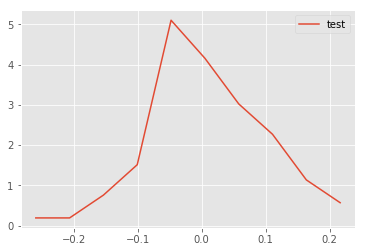

In [43]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = .5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

In [52]:
density(male_df.Height)

(array([59.4364968 , 61.49568054, 63.55486429, 65.61404803, 67.67323177,
        69.73241551, 71.79159925, 73.85078299, 75.90996673, 77.96915048]),
 array([0.00097126, 0.00621606, 0.02146482, 0.06672547, 0.12529236,
        0.12937165, 0.09285233, 0.03389693, 0.00767294, 0.00116551]))

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

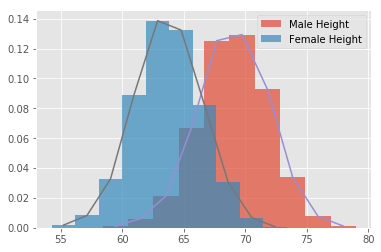

In [53]:
plt.hist(male_df['Height'], alpha=.7, bins=10, density=True, label='Male Height')
plt.hist(female_df['Height'], alpha=.7, bins=10, density=True, label='Female Height')
plt.legend()
x,y= density(male_df.Height)
a,b = density(female_df.Height)
plt.plot(x,y)
plt.plot(a,b)

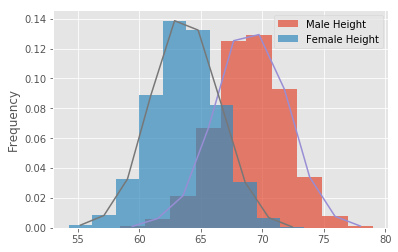

#### Repeat above exerice for male and female weights

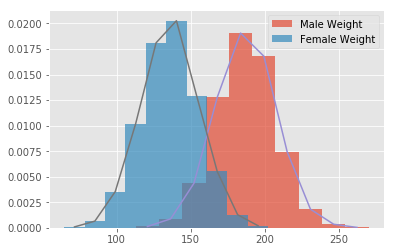

In [54]:
plt.hist(male_df.Weight, alpha=.7, bins=10, density=True, label='Male Weight')
plt.hist(female_df.Weight, alpha=.7, bins=10, density=True, label='Female Weight')
plt.legend()
x,y= density(male_df.Weight)
a,b = density(female_df.Weight)
plt.plot(x,y)
plt.plot(a,b)

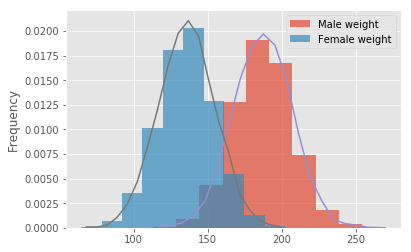

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


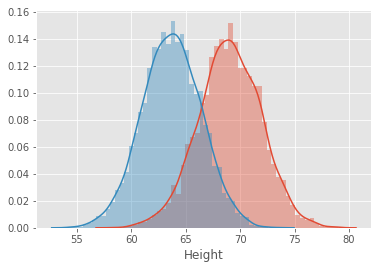

In [61]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)


Text(0.5,1,'Comparing weights')

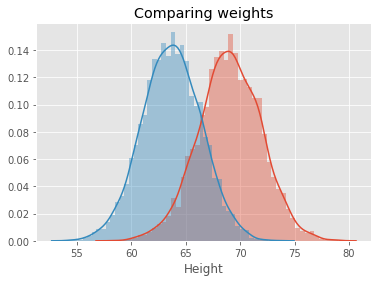

In [ ]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.